<a href="https://colab.research.google.com/github/bdajk/sentiment/blob/master/SentimentAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# @Broc - Feb 2019
# Q) Hey Watson: does sentiment vary in articles on BlockChain 
#    published in the past month between the FT, WSJ, and BBG? 

# 1. Install required libraries
!pip install -q newsapi-python
!pip install --upgrade "watson-developer-cloud>=2.5.1"

from newsapi import NewsApiClient
import pandas as pd
import json
import requests
import seaborn as sns

Requirement already up-to-date: watson-developer-cloud>=2.5.1 in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [0]:
# 2. Setup Auth and Keys
# 2a: get your NewsAPIKey from https://newsapi.org/register : 
newsapi = NewsApiClient(api_key='ade4e5a053134846b7ff2acb7aac4002')

# 2b: get your IBM Cloud Credentials from: https://cloud.ibm.com/catalog/services/natural-language-understanding
watson_username = "711b4792-170d-490f-ac0e-5d785a271868"
watson_password = "No7JUOE1UOYu"

In [0]:
# Fetch latest 100 articles from NewsAPI on bitcoin from the BBG and FT
all_articles = newsapi.get_everything(q='bitcoin',
                                      sources='bloomberg,financial-times',
                                      language='en',
                                      page_size=100,
                                      sort_by='publishedAt',
                                     )

In [0]:
# call Watson Text Analyzer to get the sentiment of a body of text
def getSentiment( content ):
  endpoint = "https://gateway.watsonplatform.net/natural-language-understanding/api/v1/analyze"
    
  parameters = {
        'features': 'sentiment',
        'version' : '2017-02-27',
        'text': content,
        'language' : 'en',
        # url = url_to_analyze, this is an alternative to sending the text
  }

  resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
  return resp.json()
  

In [0]:
# Get content from an article for analysis
# (not all articles have content - in which case use the description or title) 

def getContent( article ):
    if article['content']!=None:
      bestContent = article['content']
    elif article['description']!=None:
      bestContent = article['description']
    else:
      bestContent = article['title']

    return bestContent

In [0]:
# Call Watson to get the sentiment score for each Article

sentScores = pd.DataFrame(columns=['source','sentiment_score'])

for article in all_articles['articles']:
    sent_analysis = getSentiment( getContent( article ) )
    sentScores = sentScores.append({'source': article['source']['name'],
                                    'sentiment_score': sent_analysis['sentiment']['document']['score']},
                                   ignore_index=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Sentiment scores of recent BlockChain articles')

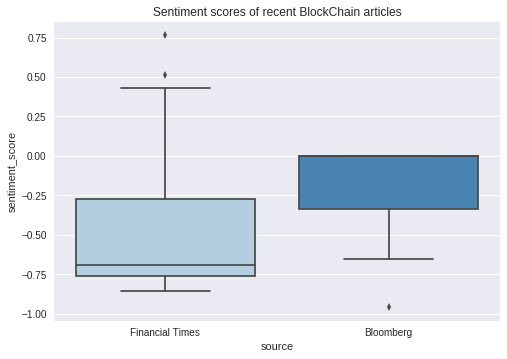

In [0]:
# plot the results - using seaborn
sns.boxplot( x=sentScores["source"],
            y=sentScores["sentiment_score"], 
            palette="Blues" ).set_title('Sentiment scores of recent BlockChain articles')
